In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import SpectralClustering 
from sklearn.manifold import TSNE
import seaborn as sns
from scipy import stats
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
cc_data = pd.read_csv("CC GENERAL.csv")
print("The shape of the dataset is:", cc_data.shape)
cc_data.head(10)

The shape of the dataset is: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

###  Customer id is an identifier and does not provide any useful information about the data. Hence droping the customer id in the subsequent steps. 

In [4]:
cc_data.drop('CUST_ID', axis = 1, inplace = True)

In [5]:
cc_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Observations

1. There are missing values in the variables CREDIT_LIMIT and MINIMUM_PAYMENTS
2. All the variables are continuous expect CASH_ADVANCE_TRX (Number of transactions made with "CASH WITH ADVANCED"), PURCHASES_TRX (Number of purchases made) and TENURE (Which is number of months/no of years)
3. CASH_ADVANCE, CASH_ADVANCED_FREQUENCY, CASH_ADVANCED_TRX variables are heavily skewed towards right as in most cases these will be zeroes.

# Handling of missing values

In [7]:
cc_data.isnull().sum().sort_values(ascending = False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

In [8]:
credit_limit_null = cc_data['CREDIT_LIMIT'].isnull()
cc_data[credit_limit_null]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


For the one record where the credit limit is missing the values of other variables are in lower quintiles and in the maximum density range. Hence replacing the one row credit limit with median of the credit limit will not cause any problems.

In [9]:
cc_data.loc[(cc_data['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = cc_data['CREDIT_LIMIT'].median()

In [10]:
cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
minimum_payments_not_null = cc_data['MINIMUM_PAYMENTS'].notnull()
cc_data[minimum_payments_not_null]['MINIMUM_PAYMENTS'].agg(['mean','std','min','max','var'])

mean    8.642065e+02
std     2.372447e+03
min     1.916300e-02
max     7.640621e+04
var     5.628503e+06
Name: MINIMUM_PAYMENTS, dtype: float64

standard deviation is larger than mean, Values of the minimum payments are varied. Minumum payments variable cannot be imputed by univariate imputation methods.

In [12]:
cc_data.corr().loc["MINIMUM_PAYMENTS"].sort_values(ascending = False)

MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398684
CASH_ADVANCE                        0.140107
BALANCE_FREQUENCY                   0.132569
INSTALLMENTS_PURCHASES              0.132172
CREDIT_LIMIT                        0.126686
PAYMENTS                            0.126651
CASH_ADVANCE_TRX                    0.109739
CASH_ADVANCE_FREQUENCY              0.098838
PURCHASES_TRX                       0.096333
PURCHASES                           0.093860
TENURE                              0.059444
ONEOFF_PURCHASES                    0.048755
PURCHASES_INSTALLMENTS_FREQUENCY    0.030073
PURCHASES_FREQUENCY                 0.003030
ONEOFF_PURCHASES_FREQUENCY         -0.030327
PRC_FULL_PAYMENT                   -0.140379
Name: MINIMUM_PAYMENTS, dtype: float64

None of the other variables are highly correlated with minimum payments hence replacing the missing values of minimum payments by methods like regression or KNN will not be meaningful. Hence replacing the missing values of minimum payments by median, as there are only 313 such rows and data has sufficient records.

In [13]:
cc_data.loc[(cc_data['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = cc_data['MINIMUM_PAYMENTS'].median()
cc_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Plot histograms to understand the distribution of different variables

In [14]:
len(cc_data.columns)

17

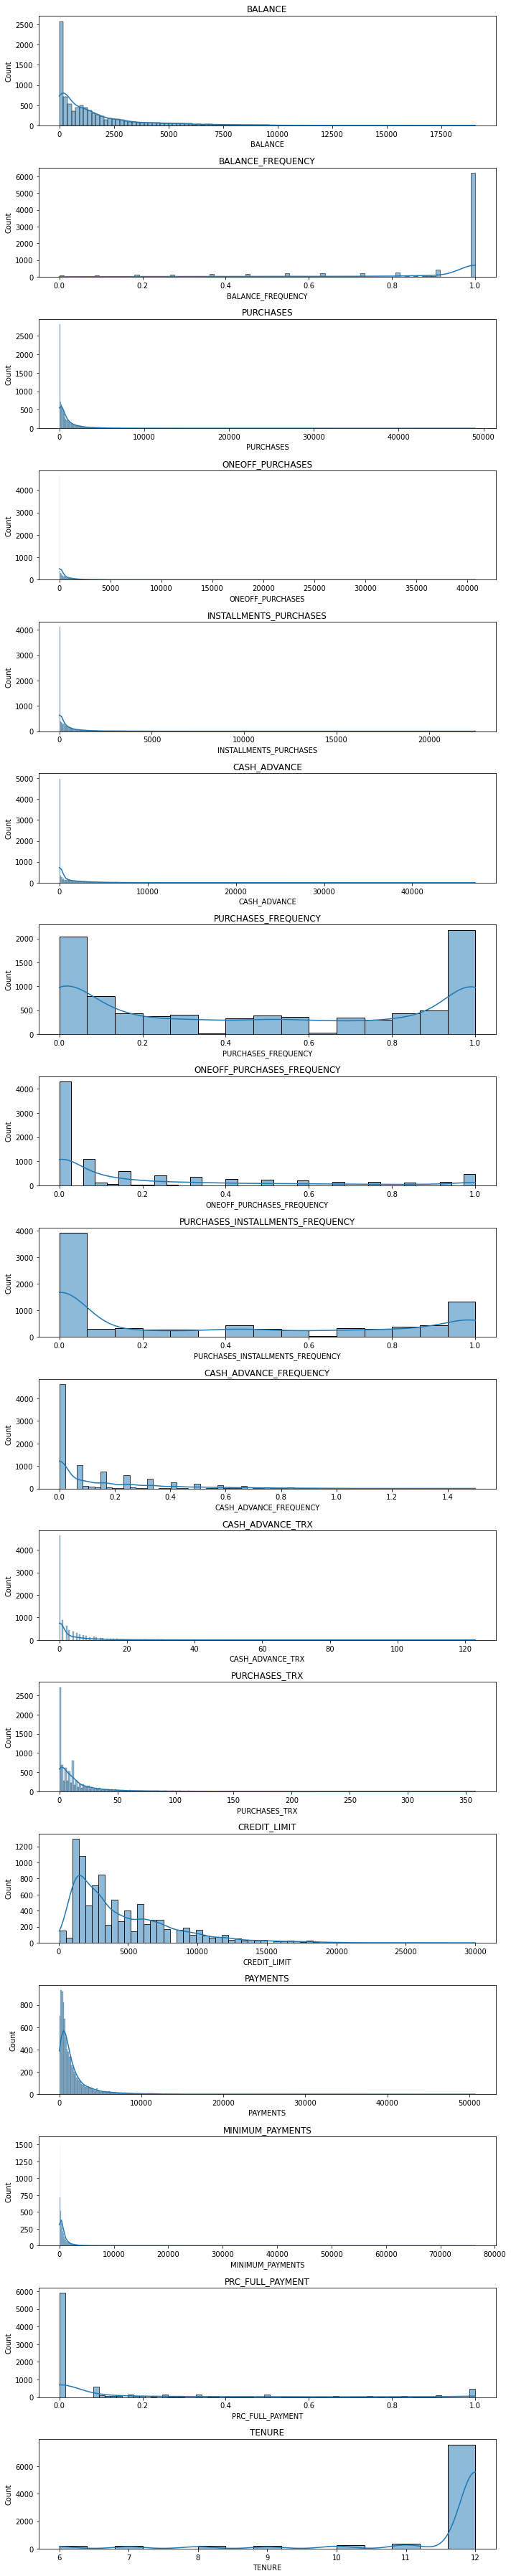

In [109]:
plt.figure(figsize=(10,50))
for i in range(len(cc_data.columns)):
  plt.subplot(17, 1, i + 1)
  sns.histplot(cc_data[cc_data.columns[i]], kde = True)
  plt.title(cc_data.columns[i])
plt.tight_layout();

# Observations
1. Balance, purchases, oneoff_purchases, installment_purchases, cash_advance, cash_advance_frequency, cash_advance_trx, purcgase_trx, credit_limit, minimum_paymets are all right skewed distributions as many values will be zero on the left and there will be a huge tail of different values on the right
2. Balance frequency and tenure are left skewed
3. purchases_frequency and purchases_installment_frequent are bimodal. Implying there are two different sets of customers who regularly use or rarely use their credit cards

# Outlier handling

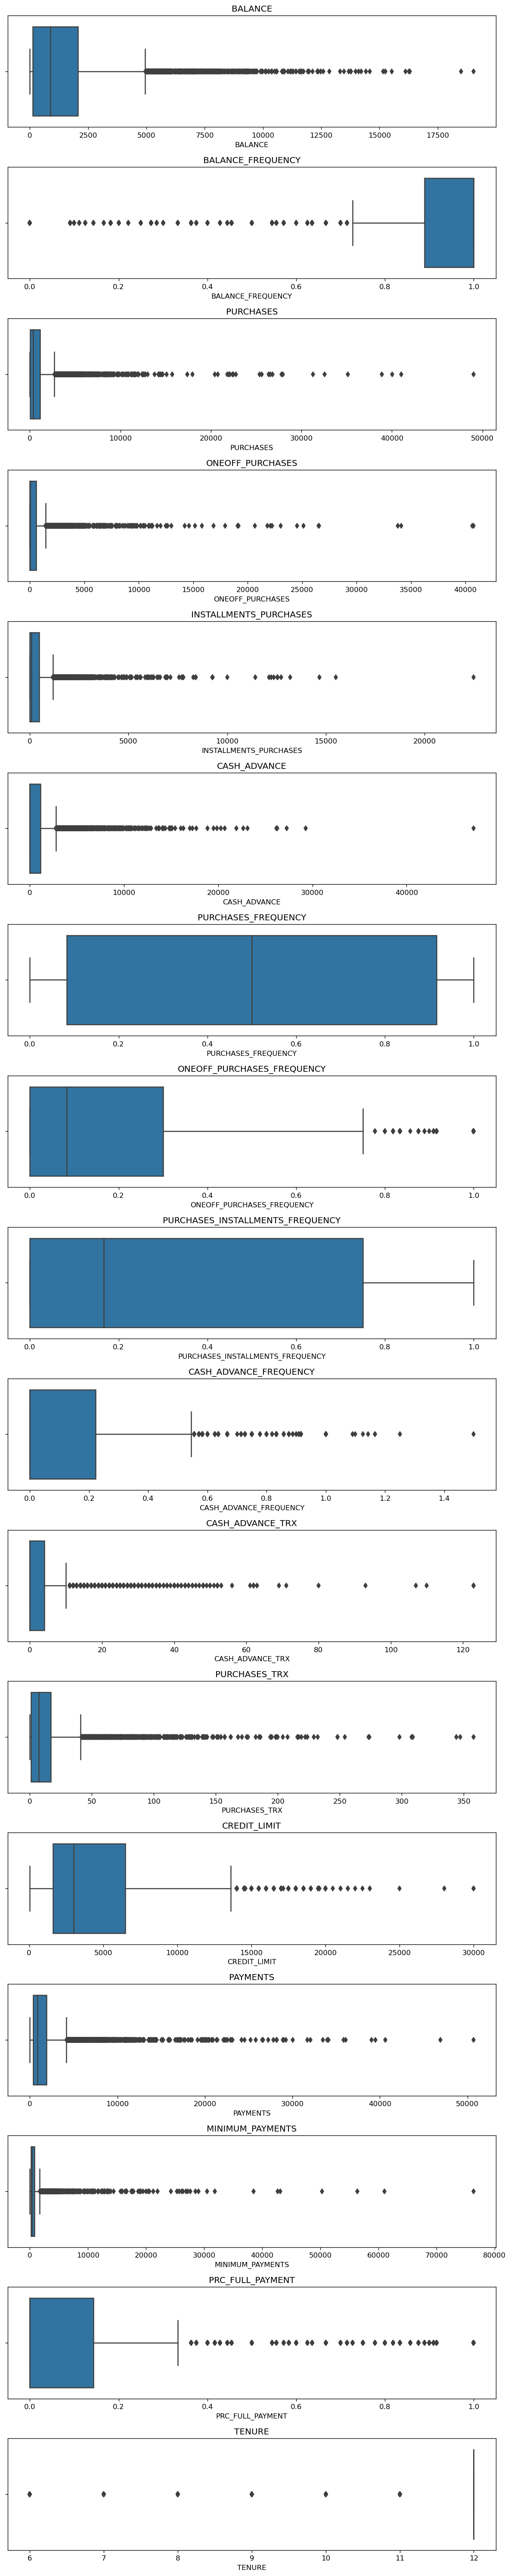

In [15]:
plt.figure(figsize = (10, 50), dpi = 120)
for i in range(len(cc_data.columns)):
  plt.subplot(17, 1, i + 1)
  sns.boxplot(x = cc_data.columns[i], data = cc_data)
  plt.title(cc_data.columns[i])
plt.tight_layout();

In [16]:
# outlier query
for i in cc_data:
    mean = cc_data[i].mean()
    std = cc_data[i].std()
    up = mean + 3*std
    low = mean - 3*std

    if cc_data[(cc_data[i] > up) | (cc_data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE yes
BALANCE_FREQUENCY yes
PURCHASES yes
ONEOFF_PURCHASES yes
INSTALLMENTS_PURCHASES yes
CASH_ADVANCE yes
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY yes
CASH_ADVANCE_TRX yes
PURCHASES_TRX yes
CREDIT_LIMIT yes
PAYMENTS yes
MINIMUM_PAYMENTS yes
PRC_FULL_PAYMENT no
TENURE yes


In [17]:
for i in cc_data.iloc[:,:-1]:
    mean = cc_data[i].mean()
    std = cc_data[i].std()
    up_lim = mean + 3*std
    low_lim = mean - 3*std
    cc_data.loc[cc_data[i] > up_lim,i] = up_lim
    cc_data.loc[cc_data[i] < low_lim,i] = low_lim

In [18]:
cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1517.358679,0.879477,916.540568,523.038845,375.094696,901.873199,0.490351,0.202458,0.364437,0.132473,3.004616,13.749644,4452.618096,1608.122197,738.838288,0.153715,11.517318
std,1880.936245,0.229530,1428.984494,1026.312096,631.659822,1628.105281,0.401371,0.298336,0.397448,0.190367,5.202474,19.214674,3482.567533,2055.669327,1180.155881,0.292499,1.338331
min,0.000000,0.166559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,7809.070466,1.000000,7413.109179,5572.101123,3124.081990,7270.362742,1.000000,1.000000,1.000000,0.735508,23.722767,89.282780,15410.222578,10418.335123,7843.283732,1.000000,12.000000


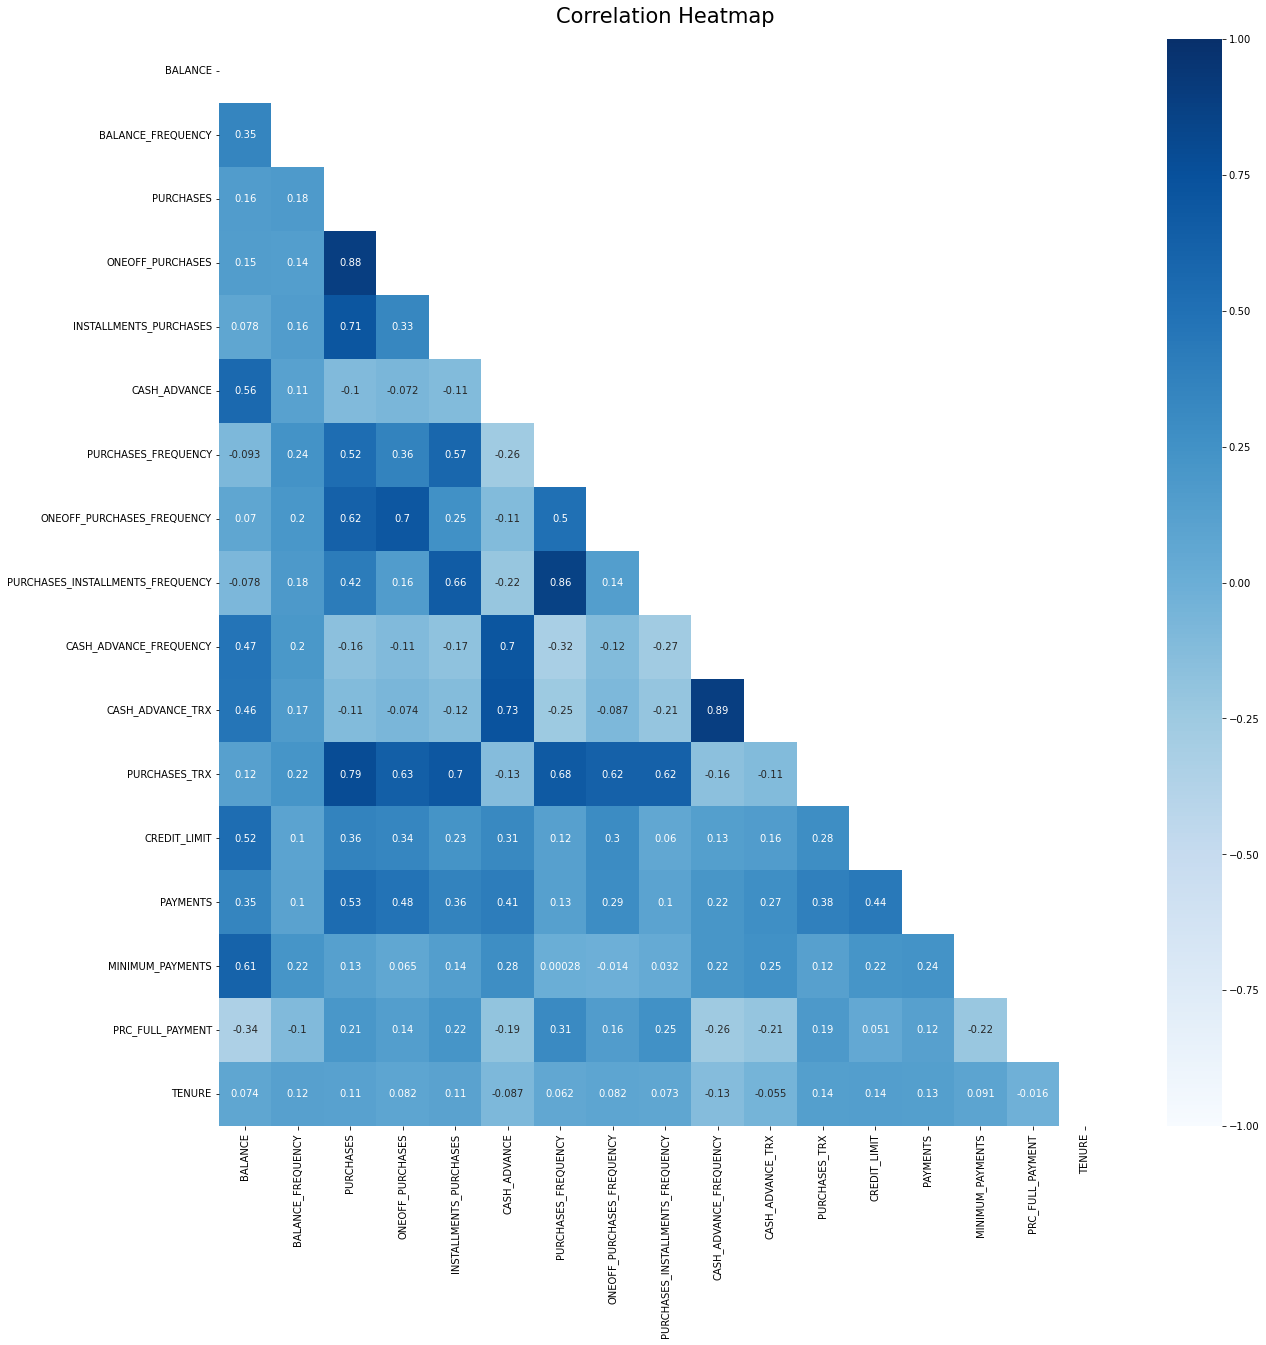

In [19]:
plt.subplots(figsize=(20,20))

mask = np.triu(np.ones_like(cc_data.corr()))
heatmap = sns.heatmap(cc_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':21}, pad=16);

In [20]:
scaler = StandardScaler()
cc_data_scaled = scaler.fit_transform(cc_data)

In [21]:
cc_data_scaled

array([[-0.78500291, -0.26705893, -0.57466435, ..., -0.5078668 ,
        -0.52555097,  0.36067954],
       [ 0.89593833,  0.12902893, -0.64142878, ...,  0.28260721,
         0.2342269 ,  0.36067954],
       [ 0.51987132,  0.52511679, -0.10033599, ..., -0.09452966,
        -0.52555097,  0.36067954],
       ...,
       [-0.79430841, -0.20104647, -0.54037235, ..., -0.55624567,
         0.32919999, -4.12276757],
       [-0.7995939 , -0.20104647, -0.64142878, ..., -0.57883949,
         0.32919999, -4.12276757],
       [-0.60858764, -0.92720536,  0.12366776, ..., -0.55127097,
        -0.52555097, -4.12276757]])

# K-Means clustering technique

In [117]:
# from yellowbrick.cluster import SilhouetteVisualizer
# fig, ax = plt.subplots(5, 2, figsize=(15,8))
# for i in range(2, 10):
#     '''
#     Create KMeans instances for different number of clusters
#     '''
#     km = KMeans(n_clusters=i)
#     q, mod = divmod(i, 2)
#     '''
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
#     '''
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(cc_data_scaled) 

In [22]:
cc_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6


In [23]:
new_cc_data = cc_data[['BALANCE','PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','CREDIT_LIMIT','PAYMENTS',
                       'PRC_FULL_PAYMENT','TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']]

In [24]:
new_cc_data.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_TRX,PURCHASES_TRX
0,40.900749,95.40,0.000000,0.166667,1000.0,201.802084,0.000000,12,0.0,2.0
1,3202.467416,0.00,6442.945483,0.000000,7000.0,4103.032597,0.222222,12,4.0,0.0
2,2495.148862,773.17,0.000000,1.000000,7500.0,622.066742,0.000000,12,0.0,12.0
3,1666.670542,1499.00,205.788017,0.083333,7500.0,0.000000,0.000000,12,1.0,1.0
4,817.714335,16.00,0.000000,0.083333,1200.0,678.334763,0.000000,12,0.0,1.0


In [25]:
scaler = StandardScaler()
new_cc_data_scaled = scaler.fit_transform(new_cc_data)

## For lesser number of variables - important variables only - removed highly correlated columns (above 50-60s%)

In [26]:
silhouette_avg = []
for num_clusters in range(2, 18):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(new_cc_data_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(new_cc_data_scaled, cluster_labels))

In [27]:
silhouette_avg

[0.35777316824238875,
 0.32364349042435275,
 0.2216743340300896,
 0.24538415137416827,
 0.25528096499898084,
 0.24685593439118672,
 0.2510230396559018,
 0.23794514221088073,
 0.2399738945556442,
 0.2435831076711539,
 0.2369329593329107,
 0.22930417092692987,
 0.22667346318943096,
 0.21167853846715223,
 0.2282597672783856,
 0.21362294336408297]

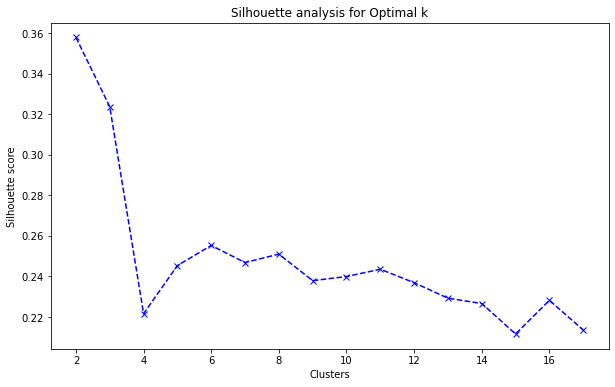

In [28]:
plt.figure(figsize = (10,6))
plt.plot(range(2, 18),silhouette_avg,"bx--")
plt.xlabel("Clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis for Optimal k")
plt.show()

In [29]:
wcss_1 = []
range_values = range(2, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(new_cc_data_scaled)
  wcss_1.append(kmeans.inertia_)
print(wcss_1)

[71382.34725009876, 57546.82008025289, 49845.29685458192, 43568.6536472092, 38899.37840563145, 36463.96864163745, 34440.48803096287, 32667.637067476808, 31138.534850098105, 29922.139595577442, 28926.566667368228, 28051.628982762206, 27139.64662347673, 26324.20081198384, 25525.69161378577, 24841.347883467402, 24370.732275768132, 23720.217843491457]


Text(0, 0.5, 'WCSS')

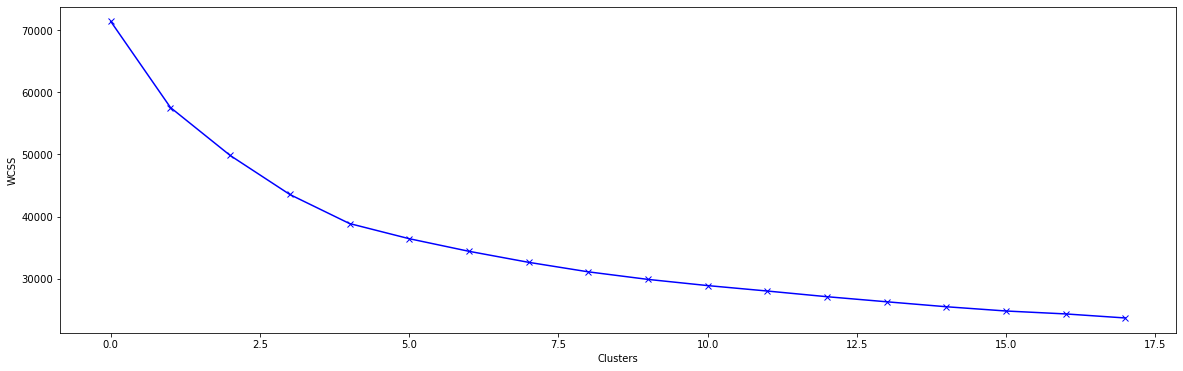

In [30]:
plt.figure(figsize = (20,6))
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [31]:
MYSEED = 4
kmeans = KMeans(n_clusters=6, random_state=MYSEED)
kmeans.fit(new_cc_data_scaled)
labels = kmeans.labels_
labels, len(labels)

(array([0, 5, 4, ..., 1, 1, 1], dtype=int32), 8950)

In [32]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [new_cc_data.columns])
cluster_centers

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_TRX,PURCHASES_TRX
0,-0.208995,-0.496720,-0.200709,-0.876980,-0.362198,-0.348262,-0.409733,0.268148,-0.108290,-0.597566
1,-0.382957,-0.377787,0.053543,-0.190810,-0.605605,-0.516936,-0.050542,-3.142442,0.032294,-0.445497
2,-0.749298,0.126514,-0.528104,0.679852,0.092417,-0.136426,2.185302,0.203075,-0.538674,0.202789
3,0.750052,2.854975,-0.194037,1.137377,1.193852,1.714661,0.294804,0.320321,-0.209717,2.581735
4,-0.204501,0.116728,-0.411973,0.894376,-0.164293,-0.195031,-0.335026,0.295109,-0.388180,0.339239
5,1.590294,-0.283121,2.049504,-0.503943,1.009242,0.915495,-0.387362,0.092055,1.761033,-0.337985


In [33]:
cc_data_cluster_averages = scaler.inverse_transform(cluster_centers)
cc_data_cluster_averages = pd.DataFrame(data = cc_data_cluster_averages, columns = [new_cc_data.columns])
cc_data_cluster_averages

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_TRX,PURCHASES_TRX
0,1124.273849,206.774910,575.115428,0.138376,3191.309837,892.251578,0.033875,11.876170,2.441273,2.268247
1,797.080837,376.718257,989.042483,0.413769,2343.675162,545.531316,0.138932,7.311927,3.172616,5.190035
2,108.056129,1097.317012,42.111712,0.763208,4774.447938,1327.690159,0.792878,11.789084,0.202334,17.645960
3,2928.080214,4996.027627,585.978959,0.946835,8610.055683,5132.701955,0.239940,11.945990,1.913630,63.354067
4,1132.727413,1083.333484,231.174811,0.849307,3880.487904,1207.225869,0.055725,11.912250,0.985230,20.267650
5,4508.433538,511.986979,4238.495409,0.288094,7967.174882,3489.972367,0.040418,11.640511,12.165832,7.255732


cluster 0: (3206) Inactive/Indolent customers - low purchase frequency (0.13), low credit limit (3191), medium balance (1124), medium cash advance (575) and low PRC_FULL_PAYMENT 3%)

Cluster 1: (654) New customers - with low tenure (7.3 months) and low balance (797)

Cluster 2: (1081) Transactors - These are customers who pay least amount of intrerest charges and careful with their money. Cluster with low balance (108), lowest cash advance (42), and highest percentage of full payment = 79%.

Cluster 3: (611) VIP/Prime - High credit limit (8610), and high percentage of full payment (24%). High number of purchases (63), highest amount spend for purchases (4996). These are your customers who spend a lot and use credit card.

Cluster 4: (2302) Active customers - medium balance (1132), medium credit limit (3880), and low percentage of full payment (6%), High number of purchases (20) target for increase credit limit and increase spending habits.

Cluster 5: (1096)Revolvers - who use credit card as a loan (most lucrative sector). High balance (4508) and cash advance (4238), low purchase frequency (0.28), high cash advance transactions (12) and low percentage of full payment (4%).

In [34]:
cc_data_w_clusters = pd.concat([new_cc_data, pd.DataFrame({'cluster':labels})], axis = 1)
cc_data_w_clusters.head(5)

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_TRX,PURCHASES_TRX,cluster
0,40.900749,95.40,0.000000,0.166667,1000.0,201.802084,0.000000,12,0.0,2.0,0
1,3202.467416,0.00,6442.945483,0.000000,7000.0,4103.032597,0.222222,12,4.0,0.0,5
2,2495.148862,773.17,0.000000,1.000000,7500.0,622.066742,0.000000,12,0.0,12.0,4
3,1666.670542,1499.00,205.788017,0.083333,7500.0,0.000000,0.000000,12,1.0,1.0,0
4,817.714335,16.00,0.000000,0.083333,1200.0,678.334763,0.000000,12,0.0,1.0,0


In [35]:
cc_data_w_clusters.cluster.value_counts()

0    3206
4    2302
5    1096
2    1081
1     654
3     611
Name: cluster, dtype: int64

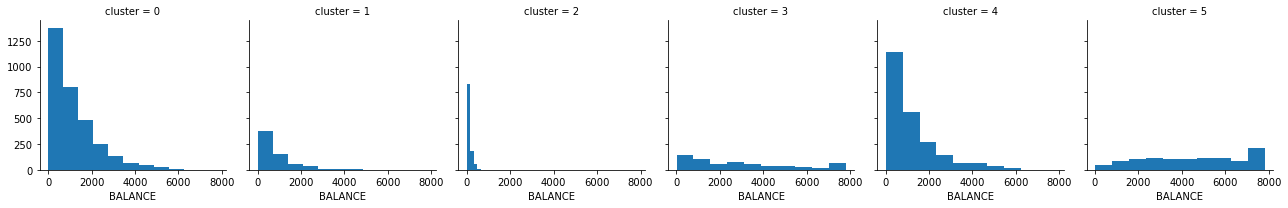

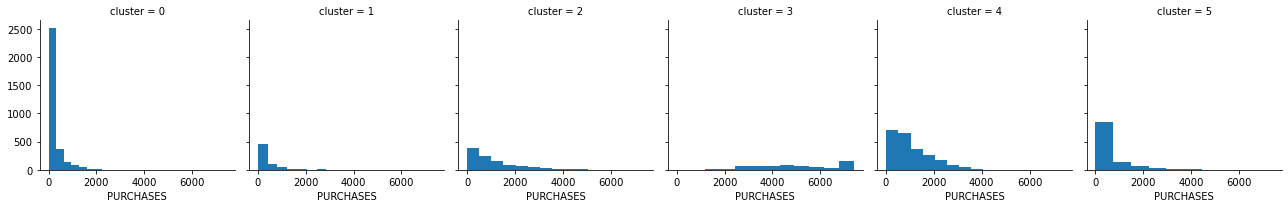

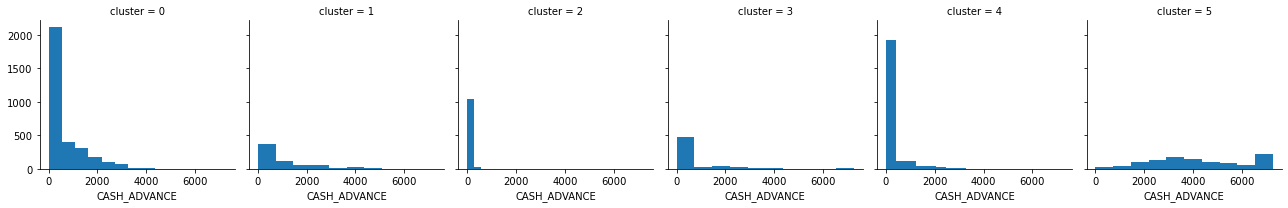

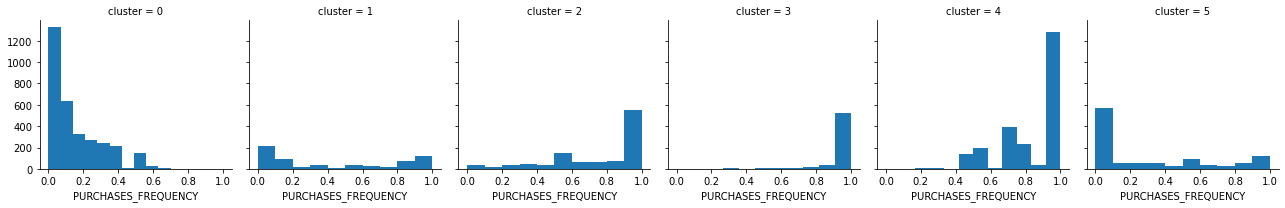

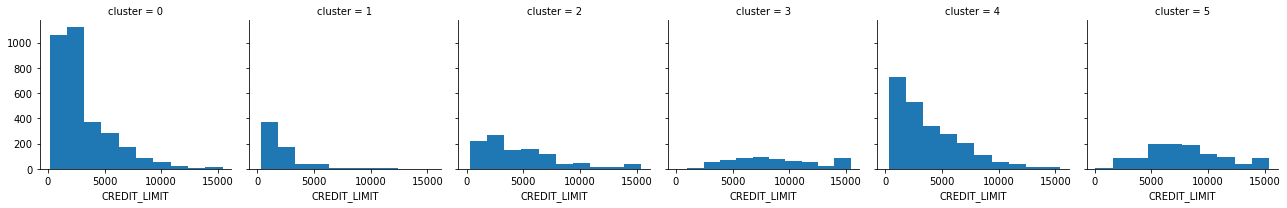

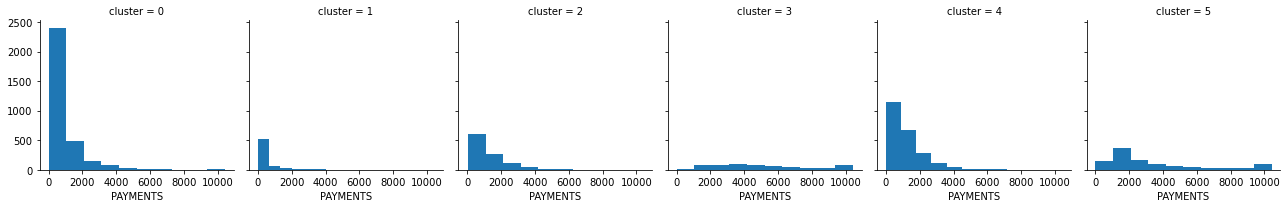

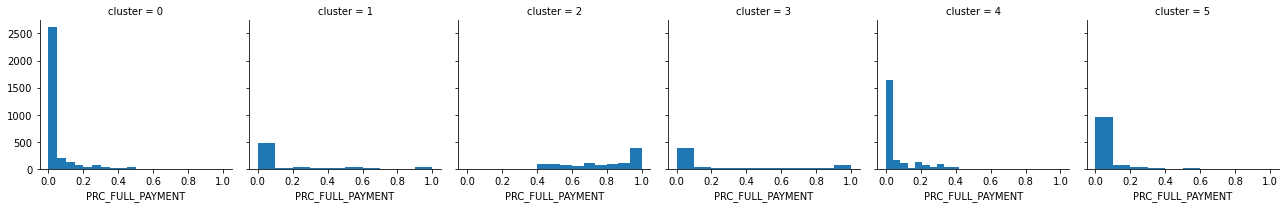

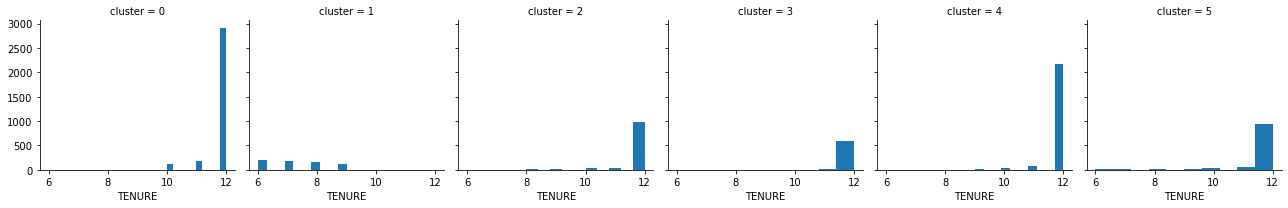

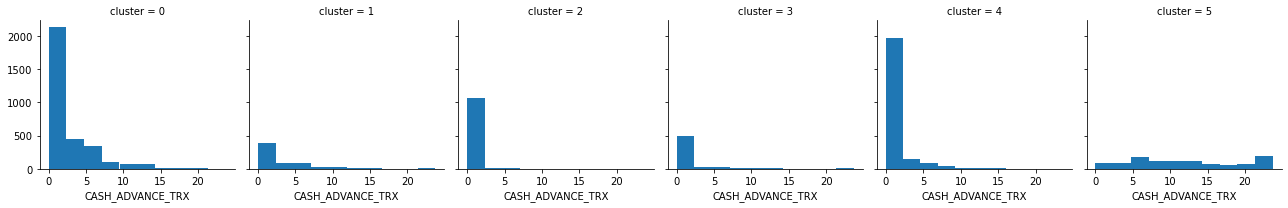

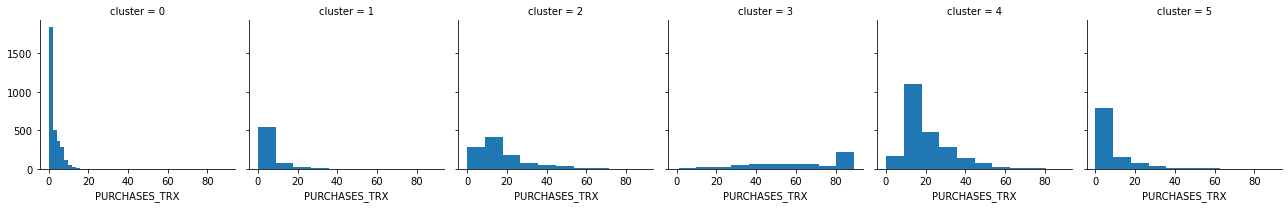

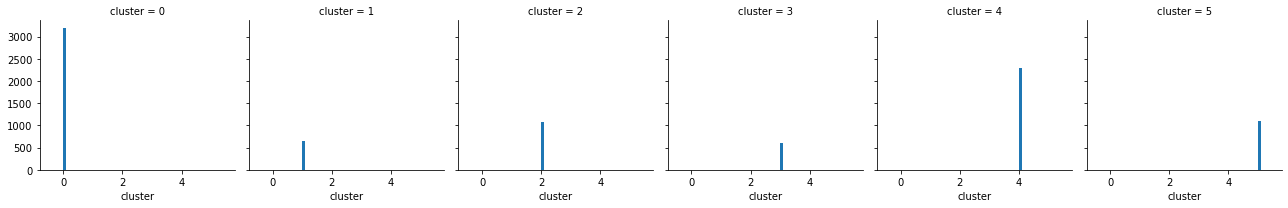

In [36]:
for c in cc_data_w_clusters:
    grid= sns.FacetGrid(cc_data_w_clusters, col='cluster')
    grid.map(plt.hist, c)

In [37]:
cc_data_cluster_averages.to_csv('new_kmeans_6.csv')

In [38]:
cc_data_w_clusters.to_csv('kmeans_w_clusters.csv')

### Since it is not possible to plot a higher dimensional space applying PCA to reduce the number of dimensions to 2 and will plot clusters on them to see if the clusters are well seperated or not

In [39]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(new_cc_data_scaled)
principal_comp

array([[-1.86933602, -0.31277806],
       [ 0.83548314,  3.07562233],
       [ 0.39186411, -0.56289295],
       ...,
       [-1.81600174, -1.02528957],
       [-2.58260179,  0.01545069],
       [-1.15002631, -0.74199643]])

In [40]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.869336,-0.312778
1,0.835483,3.075622
2,0.391864,-0.562893
3,-0.496659,0.283013
4,-1.728639,-0.014974


In [41]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.869336,-0.312778,0
1,0.835483,3.075622,5
2,0.391864,-0.562893,4
3,-0.496659,0.283013,0
4,-1.728639,-0.014974,0


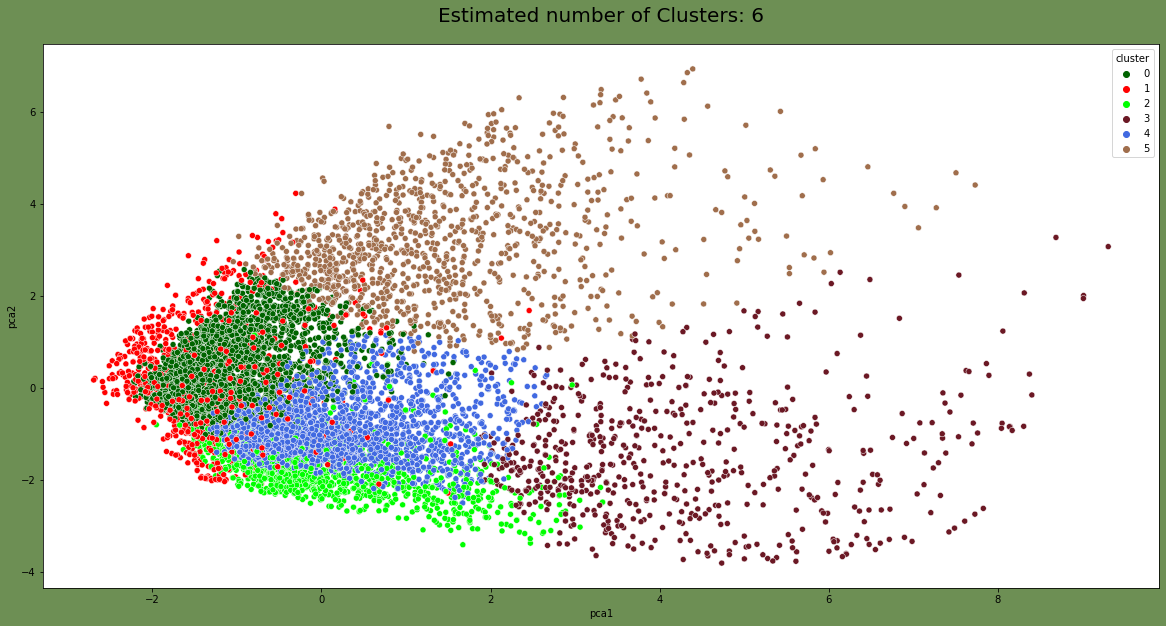

In [42]:
plt.figure(figsize = (20,10), facecolor='#6d8f54')
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df, 
                     palette = ['darkgreen', 'red', 'lime', '#6b1824', 
                                'royalblue', '#a06e4c'])
plt.title('Estimated number of Clusters: 6', fontsize = 20, color='black', y=1.03)
plt.show()

## Hierarchical agglomerative clustering 

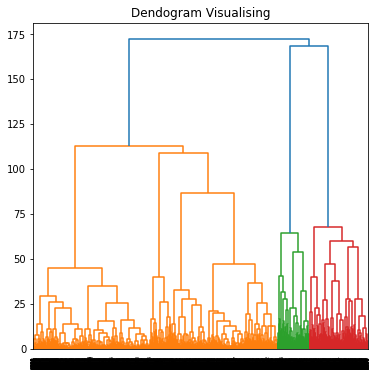

In [149]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(6, 6)) 
plt.title('Dendogram Visualising') 
Dendrogram = shc.dendrogram((shc.linkage(new_cc_data_scaled, method ='ward'))) 

In [150]:
#Reapply Silhouette score this time on Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

sil_scores = []
for i in range(2,20):
    HC_model = AgglomerativeClustering(n_clusters = i)
    HC_model.fit(new_cc_data_scaled)
    sil_scores.append(round(silhouette_score(new_cc_data_scaled, HC_model.labels_),4))

print(sil_scores)


[0.305, 0.3129, 0.1694, 0.1961, 0.2068, 0.2044, 0.2059, 0.2128, 0.2141, 0.2164, 0.1855, 0.1873, 0.132, 0.134, 0.1357, 0.1369, 0.1396, 0.1433]


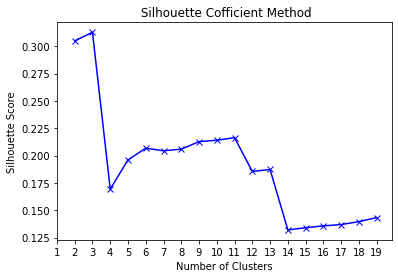

In [151]:
ax , fig = plt.subplots()
ax = plt.plot(range(2,20) , sil_scores , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhouette Cofficient Method")
plt.show()

In [152]:
#Fit model and also on 2 clusters
HC_Model = AgglomerativeClustering(n_clusters = 6)
HC_Model.fit(new_cc_data_scaled)
labels_agg = HC_Model.fit_predict(new_cc_data_scaled)
labels_agg

array([3, 0, 1, ..., 4, 4, 4])

In [153]:
new_cc_data_w_agg_clusters = pd.concat([new_cc_data, pd.DataFrame({'cluster_agg':labels_agg})], axis = 1)
new_cc_data_w_agg_clusters.head(5)

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_TRX,PURCHASES_TRX,cluster_agg
0,40.900749,95.40,0.000000,0.166667,1000.0,201.802084,0.000000,12,0.0,2.0,3
1,3202.467416,0.00,6442.945483,0.000000,7000.0,4103.032597,0.222222,12,4.0,0.0,0
2,2495.148862,773.17,0.000000,1.000000,7500.0,622.066742,0.000000,12,0.0,12.0,1
3,1666.670542,1499.00,205.788017,0.083333,7500.0,0.000000,0.000000,12,1.0,1.0,3
4,817.714335,16.00,0.000000,0.083333,1200.0,678.334763,0.000000,12,0.0,1.0,3


In [154]:
new_cc_data_w_agg_clusters.cluster_agg.value_counts()

3    3125
1    1903
0    1559
5     961
2     843
4     559
Name: cluster_agg, dtype: int64

In [155]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(new_cc_data, labels_agg)
print(clf.centroids_)

[[3.76706400e+03 4.06577556e+02 3.43555735e+03 2.29038669e-01
  7.17446191e+03 3.00586436e+03 4.23690308e-02 1.13656190e+01
  9.94182561e+00 5.64821396e+00]
 [1.30691480e+03 1.11728724e+03 3.54322812e+02 8.59858718e-01
  4.08672157e+03 1.25103589e+03 4.36059327e-02 1.18733579e+01
  1.31213873e+00 2.03405150e+01]
 [2.40765197e+03 4.30770595e+03 4.90246374e+02 9.38209512e-01
  7.94461977e+03 4.35579890e+03 3.61198066e-01 1.19454330e+01
  1.63346359e+00 5.73967567e+01]
 [9.05475620e+02 2.56620192e+02 4.25188499e+02 1.87670668e-01
  2.80907833e+03 7.93238537e+02 3.07005600e-02 1.18611200e+01
  2.08448000e+00 3.18272000e+00]
 [5.13403609e+02 5.20823363e+02 5.12883664e+02 5.27558750e-01
  2.26363824e+03 5.74364572e+02 2.65792987e-01 7.40250447e+00
  1.66726297e+00 7.07206222e+00]
 [7.72049929e+01 7.47670739e+02 1.32790742e+01 7.52308204e-01
  4.31618799e+03 8.88606785e+02 7.05206238e-01 1.19583767e+01
  7.49219563e-02 1.37991675e+01]]


In [156]:
cluster_centers_agg_averages = pd.DataFrame(data = clf.centroids_, columns = [new_cc_data.columns])
cluster_centers_agg_averages

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_TRX,PURCHASES_TRX
0,3767.064000,406.577556,3435.557352,0.229039,7174.461911,3005.864364,0.042369,11.365619,9.941826,5.648214
1,1306.914798,1117.287236,354.322812,0.859859,4086.721573,1251.035889,0.043606,11.873358,1.312139,20.340515
2,2407.651973,4307.705954,490.246374,0.938210,7944.619772,4355.798904,0.361198,11.945433,1.633464,57.396757
3,905.475620,256.620192,425.188499,0.187671,2809.078330,793.238537,0.030701,11.861120,2.084480,3.182720
4,513.403609,520.823363,512.883664,0.527559,2263.638244,574.364572,0.265793,7.402504,1.667263,7.072062
5,77.204993,747.670739,13.279074,0.752308,4316.187994,888.606785,0.705206,11.958377,0.074922,13.799168


cluster 0: (1559) Revolvers - who use credit card as a loan (most lucrative sector). High balance (3767) and cash advance (3435), low purchase frequency (0.23), high cash advance transactions (10) and low percentage of full payment (4%).

Cluster 1: (1903) Active customers - medium balance (1306), medium credit limit (4086), and low percentage of full payment (4%), High number of purchases (20) target for increase credit limit and increase spending habits. 

Cluster 2: (843) VIP/Prime - High credit limit (7944), and high percentage of full payment (36%). High number of purchases (57), highest amount spend for purchases (4307). These are your customers who spend and use credit card a lot. 

Cluster 3: (3125) Inactive/Indolent customers - low purchase frequency (0.18), low credit limit (2809), medium balance (905), medium cash advance (425) and low PRC_FULL_PAYMENT (3%)

Cluster 4: (559) New customers - with low tenure (7.4 months) and low balance (513)

Cluster 5: (961) Transactors - These are customers who pay least amount of intrerest charges and careful with their money. Cluster with low balance (77), lowest cash advance (13), and highest percentage of full payment = 71%.

In [161]:
cluster_centers_agg_averages.to_csv('agg_6.csv')

In [167]:
new_cc_data_w_agg_clusters.to_csv('new_cc_data_w_agg_clusters.csv')

In [172]:
pca_df2 = pd.concat([pca_df, pd.DataFrame({'cluster_agg':labels_agg})], axis=1)
pca_df2.drop('cluster', axis = 1, inplace = True)
pca_df2.head()

,pca1,pca2,cluster_agg
0,-1.869336,-0.312778,3
1,0.835483,3.075622,0
2,0.391864,-0.562893,1
3,-0.496659,0.283013,3
4,-1.728639,-0.014974,3


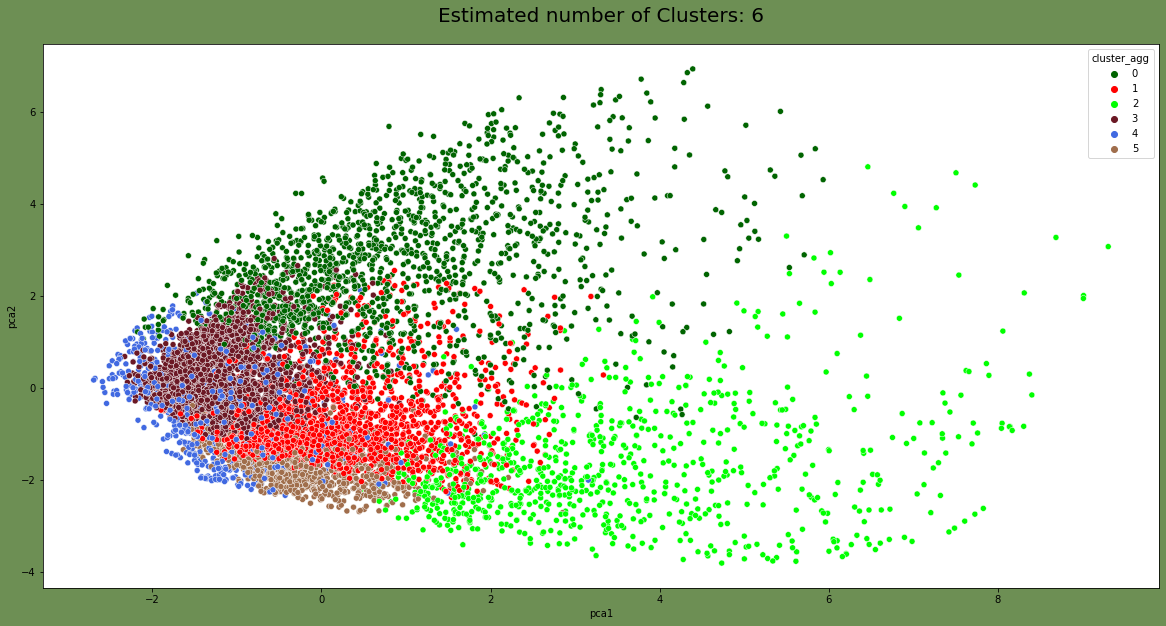

In [175]:
plt.figure(figsize = (20,10), facecolor='#6d8f54')
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster_agg', 
                     data=pca_df2, 
                     palette = ['darkgreen', 'red', 'lime', '#6b1824', 
                                'royalblue', '#a06e4c'])
plt.title('Estimated number of Clusters: 6', fontsize = 20, color='black', y=1.03)
plt.show()

# Spectral Clustering 

# Hard Coding (based on lecture notes)

# Using nearest neighbours as affinity

In [48]:
#doing this step again for inverse of fit_transform

new_cc_data = cc_data[['BALANCE','PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','CREDIT_LIMIT','PAYMENTS',
                       'PRC_FULL_PAYMENT','TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']]

new_cc_data_scaled = scaler.fit_transform(new_cc_data)


from sklearn.neighbors import kneighbors_graph
from scipy import sparse

#creating a similarity matrix based on connectivity, using KNN (k=8)
similarity = kneighbors_graph(X=new_cc_data_scaled, n_neighbors=8, mode='connectivity')
#transforming the same before creating laplacian graph
adjacency_mat = (1/2)*(similarity + similarity.T)
#creating laplacian graph using inbuilt function 
graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_mat, normed=False)
graph_laplacian = graph_laplacian_s.toarray() #typecasting to array format

In [49]:
graph_laplacian

array([[10. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  5. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 10.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  8. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  5. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  6.5]])

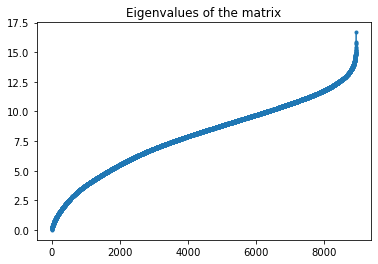

In [50]:
eig_val,eig_mat = np.linalg.eigh(graph_laplacian)  #getting the eigen vectors and eigen values of Laplacian
plt.figure()
plt.plot(eig_val, marker='.');
plt.title('Eigenvalues of the matrix')
plt.show()

In [51]:
eig_val[:10]  #printing the first 10 eigenvalues

array([4.72383467e-15, 5.02556638e-02, 6.41868458e-02, 7.50485018e-02,
       9.35645495e-02, 1.14623370e-01, 1.39201052e-01, 1.57010099e-01,
       1.66165296e-01, 1.84756501e-01])

## We consider first 5 coz they are closer to 0

In [52]:
Z = eig_mat[:,:5]  #using the first 5 vectors

# Now, K Means

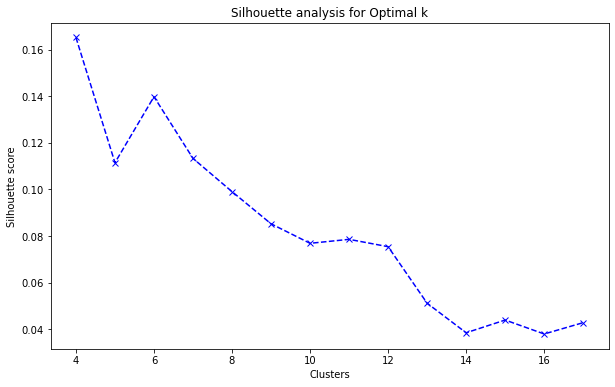

In [53]:
silhouette_avg = []
for num_clusters in range(4, 18):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(Z)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(new_cc_data_scaled, cluster_labels))
plt.figure(figsize = (10,6))
plt.plot(range(4, 18),silhouette_avg,"bx--")
plt.xlabel("Clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis for Optimal k")
plt.show()

[3.191668521454811, 2.427928313132607, 1.7136430322955047, 1.1722569714796607, 0.969291962555662, 0.8415643134260016, 0.756081080804073, 0.6870906605275289, 0.609932322342047, 0.5542203284530558, 0.5054857482728283, 0.4583674599685075, 0.427119145446577, 0.39537798022395537, 0.3764841364337702, 0.3467275651994526, 0.3233410688935811, 0.30709981725048696]


Text(0, 0.5, 'WCSS')

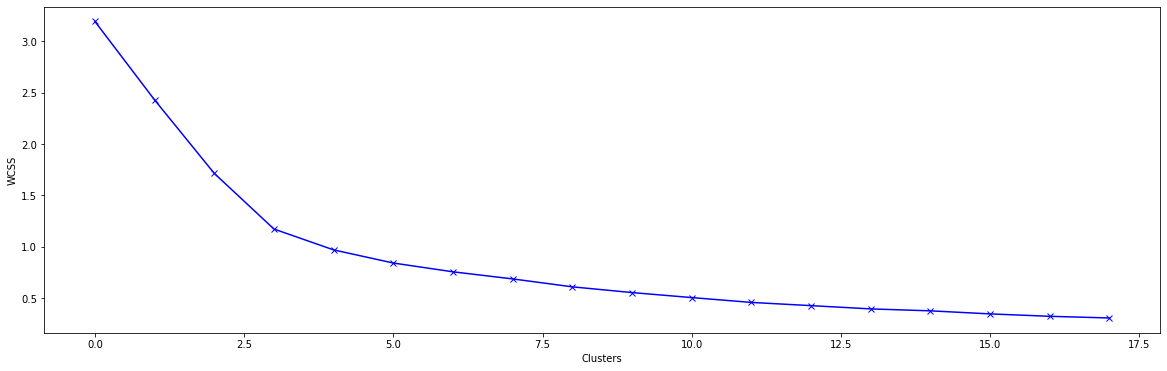

In [54]:
wcss_1 = []
range_values = range(2, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(Z)
  wcss_1.append(kmeans.inertia_)
print(wcss_1)
plt.figure(figsize = (20,6))
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

## Thus, we use 4 as clusters

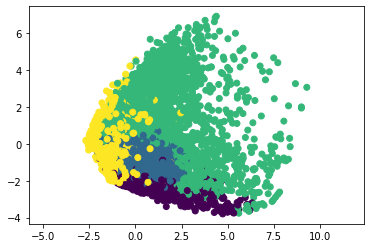

In [56]:
pca = PCA(n_components = 2)
new_principal_comp = pca.fit_transform(new_cc_data_scaled)
new_principal_comp

est = KMeans(n_clusters=4)
clusters = est.fit_predict(Z)
plt.scatter(new_principal_comp[:, 0], new_principal_comp[:, 1], c=clusters) 
plt.axis('equal')
plt.show()

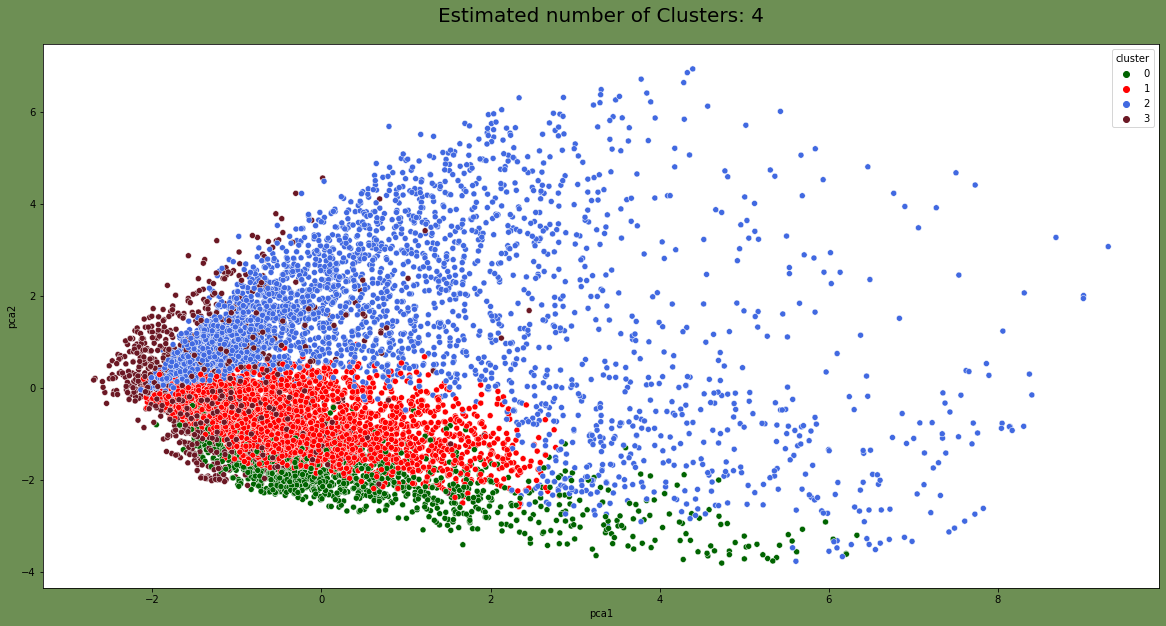

In [57]:
new_principal_comp = pca.fit_transform(new_cc_data_scaled)
pca_df = pd.DataFrame(data = new_principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':clusters})], axis=1)

plt.figure(figsize = (20,10), facecolor='#6d8f54')
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data= pca_df, 
                     palette = ['darkgreen', 'red', 'royalblue', '#6b1824'])
plt.title('Estimated number of Clusters: 4', fontsize = 20, color='black', y=1.03)
plt.show()

In [58]:
new_cc_data = cc_data[['BALANCE','PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','CREDIT_LIMIT','PAYMENTS',
                       'PRC_FULL_PAYMENT','TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']]
new_cc_data_scaled = scaler.fit_transform(new_cc_data)
new_cc_data_scaled = pd.DataFrame(new_cc_data_scaled, index = new_cc_data.index, columns = new_cc_data.columns) 

spec_clust_avg = pd.DataFrame(data = new_cc_data_scaled)
spec_clust_avg['clusters'] = pd.Series(clusters)
spec_clust_avg = pd.DataFrame(data = scaler.inverse_transform(spec_clust_avg.groupby(['clusters']).mean()), columns = spec_clust_avg.columns[:-1])
spec_clust_avg

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_TRX,PURCHASES_TRX
0,140.728142,1485.397805,28.760450,0.779038,5073.525193,1625.111433,0.804603,11.821584,0.110531,21.963621
1,801.848369,830.274438,116.364713,0.613643,3608.247106,970.136226,0.055688,11.937045,0.544208,14.191218
2,2875.954591,923.914674,2005.884022,0.280344,5598.993303,2498.044781,0.043697,11.830543,6.541036,12.293423
3,773.985277,430.504233,883.944483,0.431523,2268.235329,530.729532,0.132193,7.671035,2.832462,5.923044


## Inference might change depending on the clusters getting randomized

### Cluster 0: Transactors;  Low balance (141), low cash advance (29), high prc full payment (80)
### Cluster 1: Active Customers;  Moderate Balance (802), High Purchase Trx(14), low_full_pay% (6)
### Cluster 2: Revolvers;  Good balance (2876), low purchse freq (0.28), highest cash advance (2006), high credit limit (5598), lowest full payment% (4)
### Cluster 3: New Customers; Low Tenure (8), low balance (774)


## Achieving same using sklearn

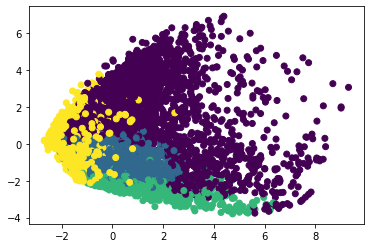

In [61]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(new_cc_data_scaled)
plt.scatter(principal_comp[:,0], principal_comp[:,1], c=labels_rbf)
plt.show()